In [88]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [89]:
# Antecedents objects hold universe variables and membership function

dishes = ctrl.Antecedent(np.arange(0, 50, 1), 'dishes')
dirtiness = ctrl.Antecedent(np.arange(0, 100, 1), 'dirtiness')
wash_time = ctrl.Consequent(np.arange(0, 90, 1), 'wash_time')

# Auto-membership function population is possible with .automf
dishes.automf(3)
dirtiness.automf(3)

# Custom membership functions can be built interactively with a familiar, Pythonic API
dishes['LOW'] = fuzz.trimf(dishes.universe, [0, 0, 13])
dishes['AVERAGE'] = fuzz.trimf(dishes.universe, [13, 13, 25])
dishes['HIGH'] = fuzz.trimf(dishes.universe, [25, 25, 40])
dishes['EXTRA HIGH'] = fuzz.trimf(dishes.universe, [40, 50, 50])

dirtiness['LIGHT'] = fuzz.trimf(dirtiness.universe, [0, 0, 25])
dirtiness['MEDIUM'] = fuzz.trimf(dirtiness.universe, [25, 25, 50])
dirtiness['HEAVY'] = fuzz.trimf(dirtiness.universe, [50, 75, 75])
dirtiness['VERY HEAVY'] = fuzz.trimf(dirtiness.universe, [75, 100, 100])

wash_time['SHORT'] = fuzz.trimf(wash_time.universe, [0, 0, 30])
wash_time['AVERAGE'] = fuzz.trimf(wash_time.universe, [30, 30, 60 ])
wash_time['LONG'] = fuzz.trimf(wash_time.universe, [60, 60, 90])

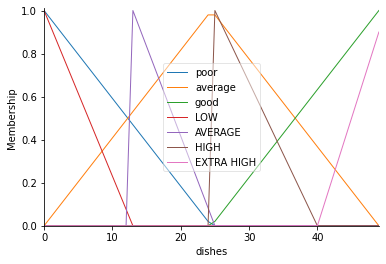

In [90]:
dishes.view()

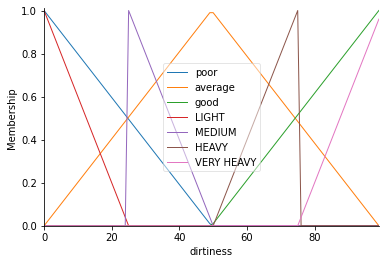

In [91]:
dirtiness.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd708a4a4d0>)

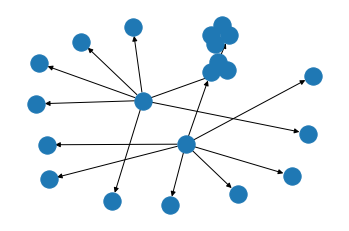

In [92]:
# 10 rules are :
# 1. If the number of dishes are Low OR the level of dirtiness is Light, then the wash time will be Short
# 2. If the number of dishes are Average AND the level of dirtiness is Very High then then the wash time will be Long
# 3. If the number of dishes are Average AND the level of dirtiness is Medium, then the wash time will be Short
# 4. If the number of dishes are High AND the level of dirtiness is Medium, then the wash time will be Average
# 5. If the number of dishes are Low AND the level of dirtiness is Very Heavy, then the wash time will be Average
# 6. If the number of dishes are Very High OR the level of dirtiness is Very Heavy, then the wash time will be Long
# 7. If the number of dishes are Extra high AND the level of dirtiness is Very Heavy, then the wash time will be Long
# 8. If the number of dishes are Extra high OR the level of dirtiness is Heavy, then the wash time will be Long
# 9. If the number of dishes are Low AND the level of dirtiness is very Heavy, then the wash time will be Average
# 10. If the number of dishes are average AND the level of dirtiness is Heavy, then the wash time will be Long

rule1 = ctrl.Rule(dishes['LOW'] | dirtiness['LIGHT'], wash_time['SHORT'])
rule2 = ctrl.Rule(dishes['AVERAGE'] & dirtiness['VERY HEAVY'], wash_time['LONG'])
rule3 = ctrl.Rule(dishes['AVERAGE'] & dirtiness['MEDIUM'], wash_time['SHORT'])
rule4 = ctrl.Rule(dishes['HIGH'] & dirtiness['MEDIUM'], wash_time['AVERAGE'])
rule5 = ctrl.Rule(dishes['LOW'] & dirtiness['VERY HEAVY'], wash_time['AVERAGE'])
rule6 = ctrl.Rule(dishes['EXTRA HIGH'] | dirtiness['VERY HEAVY'], wash_time['LONG'])
rule7 = ctrl.Rule(dishes['EXTRA HIGH'] & dirtiness['HEAVY'], wash_time['LONG'])
rule8 = ctrl.Rule(dishes['EXTRA HIGH'] | dirtiness['HEAVY'], wash_time['LONG'])
rule9 = ctrl.Rule(dishes['LOW'] & dirtiness['VERY HEAVY'], wash_time['AVERAGE'])
rule10 = ctrl.Rule(dishes['AVERAGE'] & dirtiness['HEAVY'], wash_time['LONG'])

rule4.view()

Control System

In [93]:
wash_time_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])

Creating another control system for simulation


In [94]:
WashTime = ctrl.ControlSystemSimulation(wash_time_ctrl)

In [95]:
WashTime.input['dishes'] = 5
WashTime.input['dirtiness'] = 20

time_taken = WashTime.compute()

After computing, the result can be viewed 

In [96]:
print(WashTime.output['wash_time'])

11.068376068376072
